In [5]:
# 2.6.1 基本概率论
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [9]:
fair_probs = torch.ones(6) / 6
print(fair_probs)
multinomial.Multinomial(1, fair_probs).sample()  # 10次掷骰子

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])


tensor([0., 0., 0., 0., 0., 1.])

In [12]:
multinomial.Multinomial(10, fair_probs).sample() 

tensor([2., 1., 3., 1., 3., 0.])

In [13]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample().float()
print(counts/1000)

tensor([0.1620, 0.1660, 0.1550, 0.1730, 0.1930, 0.1510])


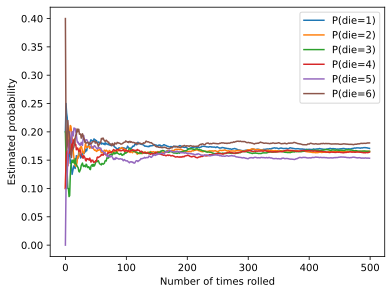

In [17]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = np.cumsum(counts, axis=0)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i], label=("P(die=" + str(i+1) + ")"))
d2l.plt.legend()
d2l.plt.xlabel("Number of times rolled")
d2l.plt.ylabel("Estimated probability")
d2l.plt.show()